## k-nearest neighbors

k-nearest neighbors (kNN) is a supervised learning algorithm that predicts the output feature of a new instance using other instances that are close for certain input features. A value of k is selected and the k instances with the closest input features are found. The output features of those k instances are used to make the prediction.

Sometimes, the phrase "birds of a feather flock together" is used to describe the k-nearest algorithm, meaning the algorithm assumes that instances with similar inputs will have similar outputs.

| ![k-nearest neighbors](knn-intro.webp) |
|:--:|
| <b>Source: https://towardsdatascience.com/getting-acquainted-with-k-nearest-neighbors-ba0a9ecf354f</b>|

### Finding nearest neighbors

A metric is a method of determining the distance between two instances. The most common metric is the Euclidean distance

$$ \boldsymbol{distance(x,y)\ =\ \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2+ \dotso + (x_p - y_p)^2}} $$

where $ \boldsymbol{x_i} $ and $ \boldsymbol{y_i} $ are the values for the input features for the instances $ \boldsymbol{x} $ and $ \boldsymbol{y} $ and $ \boldsymbol{p} $ is the number of features.

#### Minkowski distance
A metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance.

$$ \boldsymbol{D(X,Y)\ =\ \bigg( \displaystyle\sum\limits_{i=1}^n \mid x_i-y_i \mid^p)^{\frac{1}{p}} \bigg)} $$

* When p is 1, this is Manhattan distance
* When p is 2, this is Euclidean distance

### k-nearest neighbors for classification

Once the k-nearest neighbors to an instance have been found, those neighbors' output values are combined into a predicted value. For classification, the simplest method of combination is to use the most common value among the neighbors as the predicted value.

**Classification with k-nearest neighbors.**

  Step 1: Select the number of neighbors to consider, k.

  Step 2: Calculate the distance between all labeled instances and the instance to predict.

  Step 3: The k instances with the shortest distances are the nearest neighbors.

  Step 4: Use the k nearest neighbors' most common output value as the predicted value.




### k-nearest neighbors for classification in Python

*KNeighborsClassifier(n_neighbors=5)* initializes a *k*-nearest neighbors model using the five nearest neighbors. The rest of the parameters and matching values can be found in scikit-learn documentation. After initialization, the model must be fitted into the data with *model.fit(X, y)* in which *X* is a dataframe of inputs and *y* is the vector of corresponding classes.



In [1]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

[Dry_Bean_Dataset.csv](https://drive.google.com/drive/folders/1W7mKNJMiQSaL-NRsaBFfkHcNeiWQzcwy?usp=sharing)

In [2]:
# Read data, clean up names

beans = pd.read_csv("data/Dry_Bean_Dataset.csv")
beans["Class"] = beans["Class"].str.capitalize()
print(beans.shape)
beans.describe()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
beans['Class'].unique()

array(['Seker', 'Barbunya', 'Bombay', 'Cali', 'Horoz', 'Sira', 'Dermason'],
      dtype=object)

In [5]:
# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = beans[["MajorAxisLength", "MinorAxisLength"]]
y = beans[["Class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [7]:
# Train model and make predictions for the test set.
beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))
y_pred = beanKnnClassifier.predict(scaler.transform(X_test))

In [8]:
# Predict one bean
bean = pd.DataFrame(data={"MajorAxisLength": [400], "MinorAxisLength": [200]})
beanKnnClassifier.predict(scaler.transform(bean))

array(['Horoz'], dtype=object)

In [9]:
# Compute metrics
print(metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_pred, y_test))

0.8778158667972575
[[286   0  79   0   2   0   4]
 [  0 176   0   0   0   0   0]
 [ 89   0 414   0   8   0   2]
 [  0   0   0 978   4  17  93]
 [  3   0  13   2 528   0  10]
 [  3   0   1  18   0 564  15]
 [ 20   0   2  80  18  16 639]]


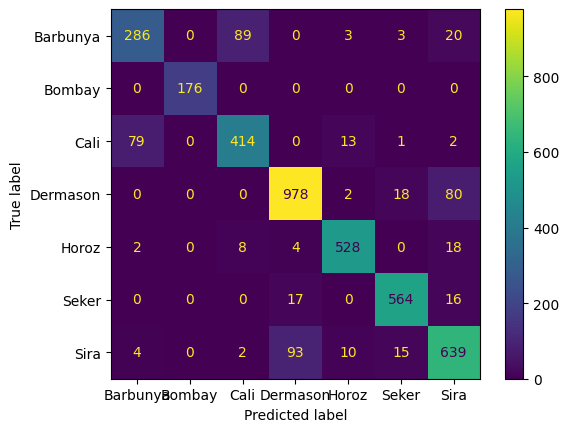

In [10]:
# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [11]:
scores_test = []
scores_train = []
start_k = 1
upper_k = 24
for i in range(start_k,upper_k):
    beanKnnClassifier = KNeighborsClassifier(n_neighbors=i)
    beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))
    y_pred = beanKnnClassifier.predict(X_train_scaled)
    scores_train.append(metrics.accuracy_score(y_pred, y_train))
    y_pred = beanKnnClassifier.predict(scaler.transform(X_test))
    scores_test.append(metrics.accuracy_score(y_pred, y_test))

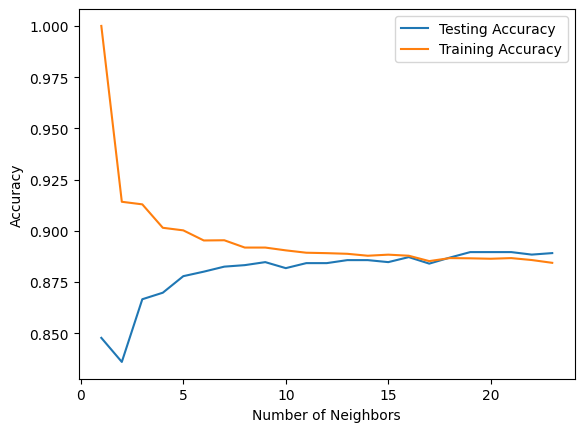

In [12]:
plt.plot(range(start_k,upper_k),scores_test, label="Testing Accuracy")
plt.plot(range(start_k,upper_k),scores_train, label = "Training Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Visualizing the regions of classification

In [13]:
# Define function for the plot.
#  X - two feature data frame,
#  y - output feature,
#  classifier - model that has been fit,
#  le - label encoder
#  with_data - plot the data with the regions


def plot_classification_regions(X, y, classifier, le, with_data=False):

    # Predict class on a regular grid

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 10, X.iloc[:, 0].max() + 10
    y_min, y_max = X.iloc[:, 1].min() - 10, X.iloc[:, 1].max() + 10
    xh = (x_max - x_min) / 200  # step size in the mesh for the x direction
    yh = (y_max - y_min) / 200  # step size in the mesh for the y direction

    xx, yy = np.meshgrid(np.arange(x_min, x_max, xh), np.arange(y_min, y_max, yh))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Get outputs ready for plotting
    Z = le.transform(Z)
    Z = Z.reshape(xx.shape)
    numClasses = len(le.classes_)
    # Plot the regions classified as different classes
    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        Z,
        levels=[i - 0.5 for i in range(numClasses + 1)],
        cmap=ListedColormap(
            sns.color_palette("colorblind", as_cmap=False, n_colors=numClasses)
        ),
    )
    
    if with_data:
        p1 = sns.scatterplot(
            data=X,
            x=X.columns[0],
            y=X.columns[1],
            hue=le.transform(np.ravel(y)),
            palette="colorblind",
            alpha=1,
            edgecolor="black",
            style=le.transform(np.ravel(y)),
        )
        leg = p1.legend()
        leg.set_title("Variety")
        for t, l in zip(leg.texts, le.inverse_transform(range(7))):
            t.set_text(l)

In [14]:
# Take a sample to keep runtime low while seeing what areas are classified as each bean
beanSample = beans.sample(750, random_state=20220509)
beanSample.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,53057.461333,856.526845,320.577447,202.055629,1.589865,0.754276,53779.113333,253.116813,0.748570,0.987180,0.871183,0.798051,0.006578,0.001699,0.640577,0.995033
std,29446.976695,213.951409,83.984543,45.914581,0.246755,0.087670,29909.388487,59.088002,0.050335,0.004647,0.060906,0.060800,0.001140,0.000578,0.096964,0.004698
min,22144.000000,545.278000,199.122967,141.785143,1.115234,0.442694,22445.000000,167.912526,0.573367,0.957982,0.593708,0.649039,0.002860,0.000667,0.421251,0.956867
25%,36336.000000,703.288500,254.171134,174.807924,1.432352,0.715949,36672.500000,215.091676,0.719762,0.985835,0.827452,0.764651,0.005902,0.001164,0.584691,0.993739
50%,45151.500000,800.566500,300.868796,191.589276,1.558308,0.766937,45656.500000,239.767961,0.758405,0.988403,0.879597,0.799744,0.006674,0.001648,0.639590,0.996507
75%,60963.500000,974.616500,375.738883,216.454654,1.698107,0.808212,62308.750000,278.605705,0.785297,0.990125,0.917283,0.833857,0.007329,0.002162,0.695318,0.997956
max,251432.000000,1919.868000,719.125690,450.926187,2.350473,0.904984,257425.000000,565.803115,0.836414,0.994049,0.984009,0.946030,0.009002,0.003173,0.894973,0.999674


In [15]:
# Create a label encoder so colors match between plots
le = preprocessing.LabelEncoder()
le.fit(beanSample["Class"])

LabelEncoder()

In [16]:
# Define input and output features
X = beanSample[["MajorAxisLength", "MinorAxisLength"]]
y = beanSample[["Class"]]

# Fit model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
beanKnnClassifier.fit(X, np.ravel(y))

KNeighborsClassifier()

C:\Users\Arnav\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


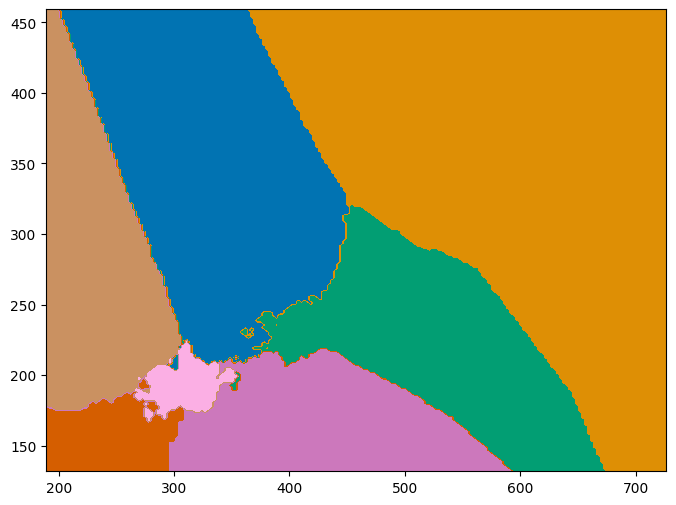

In [17]:
# Defined in the first cell in this section
plot_classification_regions(X, y, beanKnnClassifier, le, with_data=False)

### Regression with k-nearest neighbors

Once the k-nearest neighbors to an instance have been found, those neighbors' output values are combined into a predicted value. For regression, the most common method of combination is to average the nearest neighbors' output values.

**Regression with k-nearest neighbors.**

Step 1: Select k, the number of neighbors to consider.

Step 2: Calculate the distance between all labeled instances and the instance to predict.

Step 3: The k instances with the shortest distances are the nearest neighbors.

Step 4: Predict by averaging the k nearest neighbors' output values.




### k-nearest neighbors for regression in Python

KNeighborsRegressor(n_neighbors=5) initializes a k-nearest neighbors regression model using the five nearest neighbors. The rest of the parameters and matching values can be found in scikit-learn documentation. After initialization, the model must be fitted into the data with model.fit(X, y) where X is a dataframe of inputs and y is a vector of corresponding classes.



In [18]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

# Import packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
# Read data, clean up names

beans = pd.read_csv("data/Dry_Bean_Dataset.csv")
print(beans.shape)
beans.describe()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [20]:
# Initialize model
beanKnnRegressor = KNeighborsRegressor(n_neighbors=5)
# Split data
X = beans[["MajorAxisLength", "MinorAxisLength"]]
y = beans[["ConvexArea"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Fit model and predict on test data
beanKnnRegressor.fit(X_train_scaled, np.ravel(y_train))
y_pred = beanKnnRegressor.predict(X_test_scaled)

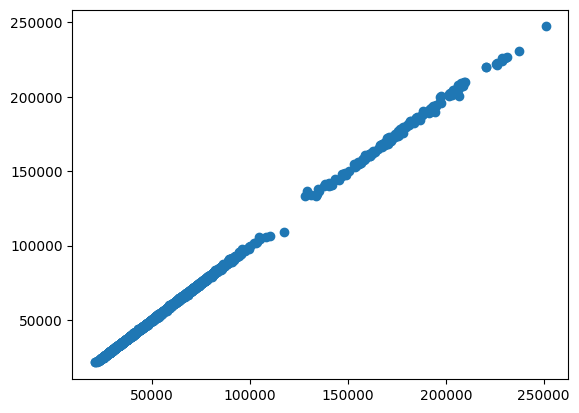

In [23]:
# Plot the actual value vs. the predicted value
plt.scatter(x=y_test, y=y_pred)

In [24]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

214025.11190989232
0.9997705192548036


In [25]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

214025.11190989232
0.9997705192548036


In [26]:
print(beanKnnRegressor.corr_)

AttributeError: 'KNeighborsRegressor' object has no attribute 'corr_'